Importing required liibraries and data files:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Training data file.csv', index_col='Customer_No')

In [3]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,...,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,,,,
1,3,61749,38,100.0,5,NaN,0.0,NaN,Yes,0.285714,...,1977,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
2,1,30831,68,100.0,1,NaN,0.0,NaN,Yes,0.000000,...,1990,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
3,1,56708,39,50.0,-3,NaN,0.0,NaN,Yes,0.200000,...,1995,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
4,0,43551,76,NaN,0,NaN,0.0,NaN,No,0.000000,...,1997,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
5,3,15287,23,33.0,11,NaN,0.0,NaN,Yes,0.250000,...,1995,19.0,0.375,28,NaN,NaN,1,10661.0,8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81253 entries, 1 to 81253
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             81253 non-null  int64  
 1   Branch_Code               81253 non-null  int64  
 2   Max_Utilization           81253 non-null  int64  
 3   Max_Perc_Def_Chg_Pending  60175 non-null  float64
 4   N_Family_Member           81253 non-null  int64  
 5   Max_Ratio_OC_Pending_POS  8607 non-null   float64
 6   N_PosBkt_L3m              75915 non-null  float64
 7   CoAp_Income               4118 non-null   float64
 8   Ever_Default_L12M         81253 non-null  object 
 9   Perc_Paymode_Online       81253 non-null  float64
 10  Perc_Repay_Fail           81253 non-null  float64
 11  Birth_Year                81253 non-null  int64  
 12  Max_DPD_L3m               81010 non-null  float64
 13  Perc_Paymode_Cheq_Fail    57776 non-null  float64
 14  Age   

In [5]:
col = df.columns

In [6]:
col

Index(['N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

In [7]:
df.drop(columns=['Branch_Code','Birth_Year'], inplace= True)

In [8]:
df.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,,
1,3,38,100.0,5,NaN,0.0,NaN,Yes,0.285714,0.428571,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
2,1,68,100.0,1,NaN,0.0,NaN,Yes,0.000000,0.200000,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
3,1,39,50.0,-3,NaN,0.0,NaN,Yes,0.200000,0.200000,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
4,0,76,NaN,0,NaN,0.0,NaN,No,0.000000,0.000000,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
5,3,23,33.0,11,NaN,0.0,NaN,Yes,0.250000,0.250000,19.0,0.375,28,NaN,NaN,1,10661.0,8,0


In [9]:
df.shape

(81253, 19)

In [10]:
df.describe()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
count,81253.000000,81253.000000,60175.000000,81253.000000,8607.000000,75915.000000,4118.000000,81253.000000,81253.000000,81010.000000,57776.000000,81253.000000,26541.000000,30948.000000,81253.000000,8.091200e+04,81253.000000,81253.000000
mean,1.463244,72.799897,85.887877,2.997403,0.127985,0.013225,66705.865712,0.142982,0.216263,10.485681,0.589924,33.350178,0.431672,1.420512,0.851082,1.462583e+05,8.306487,0.120414
std,1.192534,20.463910,30.382934,4.908966,0.167004,0.122583,10062.391979,0.162986,0.159889,9.751303,0.200213,8.946473,0.739288,0.896337,1.773618,4.509210e+05,8.583735,0.325447
min,0.000000,17.000000,0.000000,-5.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,-5.425000e+03,-7.000000,0.000000
25%,0.000000,52.000000,99.000000,-1.000000,0.045886,0.000000,67661.000000,0.000000,0.000000,0.000000,0.500000,26.000000,0.000000,1.000000,0.000000,9.992000e+03,3.000000,0.000000
50%,1.000000,76.000000,100.000000,3.000000,0.080090,0.000000,68425.000000,0.000000,0.250000,9.000000,0.500000,31.000000,0.000000,1.000000,0.000000,1.999900e+04,7.000000,0.000000
75%,3.000000,88.000000,100.000000,7.000000,0.148235,0.000000,69214.000000,0.285714,0.333333,18.000000,0.666667,39.000000,1.000000,2.000000,1.000000,1.100060e+05,13.000000,0.000000
max,3.000000,100.000000,100.000000,11.000000,4.976905,3.000000,70000.000000,0.750000,0.750000,29.000000,1.000000,67.000000,9.000000,3.000000,33.000000,6.553632e+07,43.000000,1.000000


In [11]:
df.isna().sum()

N_Default_L3m                   0
Max_Utilization                 0
Max_Perc_Def_Chg_Pending    21078
N_Family_Member                 0
Max_Ratio_OC_Pending_POS    72646
N_PosBkt_L3m                 5338
CoAp_Income                 77135
Ever_Default_L12M               0
Perc_Paymode_Online             0
Perc_Repay_Fail                 0
Max_DPD_L3m                   243
Perc_Paymode_Cheq_Fail      23477
Age                             0
Total_Field_Trails          54712
Total_Resolved              50305
N_Enq_L9m                       0
Max_Loan_Balance_Others       341
N_WorkEx_Yr                     0
Target_Flag                     0
dtype: int64

In [12]:
df1 = df.copy()

In [13]:
df.drop(columns=['Max_Perc_Def_Chg_Pending','Max_Ratio_OC_Pending_POS','CoAp_Income','Perc_Paymode_Cheq_Fail','Total_Field_Trails','Total_Resolved'], inplace=True)

In [14]:
df.fillna(0, inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_2904\1749219660.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


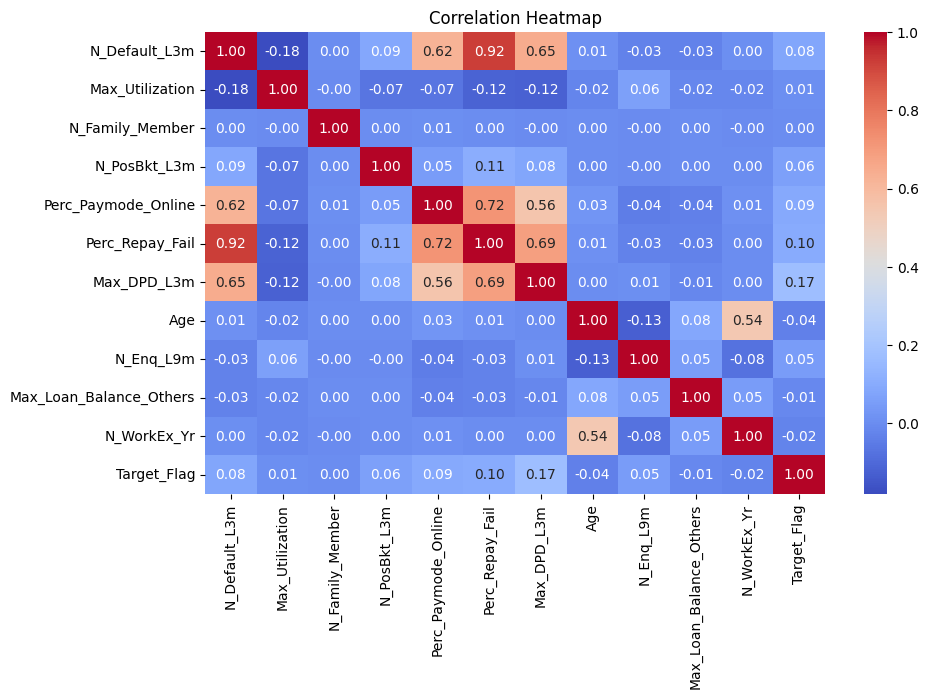

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with features
# If not, replace df with your actual DataFrame

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df2 = df.copy()

In [17]:
df.columns

Index(['N_Default_L3m', 'Max_Utilization', 'N_Family_Member', 'N_PosBkt_L3m',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Max_DPD_L3m', 'Age', 'N_Enq_L9m', 'Max_Loan_Balance_Others',
       'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

In [18]:
df['Ever_Default_L12M'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [19]:
y = df['Target_Flag'].copy()
X = df.drop('Target_Flag', axis=1).copy()

In [20]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))

In [21]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.288655,-1.700560,0.407949,-0.104246,0.512248,0.875740,1.327858,0.876168,1.413954,-0.479860,-0.311324,0.779795
1,-0.388456,-0.234556,-0.406891,-0.104246,0.512248,-0.877271,-0.101716,-0.866801,-0.039142,-0.479860,-0.296710,-0.734707
2,-0.388456,-1.651693,-1.221732,-0.104246,0.512248,0.349837,-0.101716,1.491334,-0.598025,0.083963,0.016741,-0.035706
3,-1.227012,0.156379,-0.610601,-0.104246,-1.952179,-0.877271,-1.352593,-1.071857,-0.821578,0.647786,0.079864,-0.268706
4,1.288655,-2.433562,1.630210,-0.104246,0.512248,0.656614,0.211003,0.876168,-0.598025,0.083963,-0.299916,-0.035706


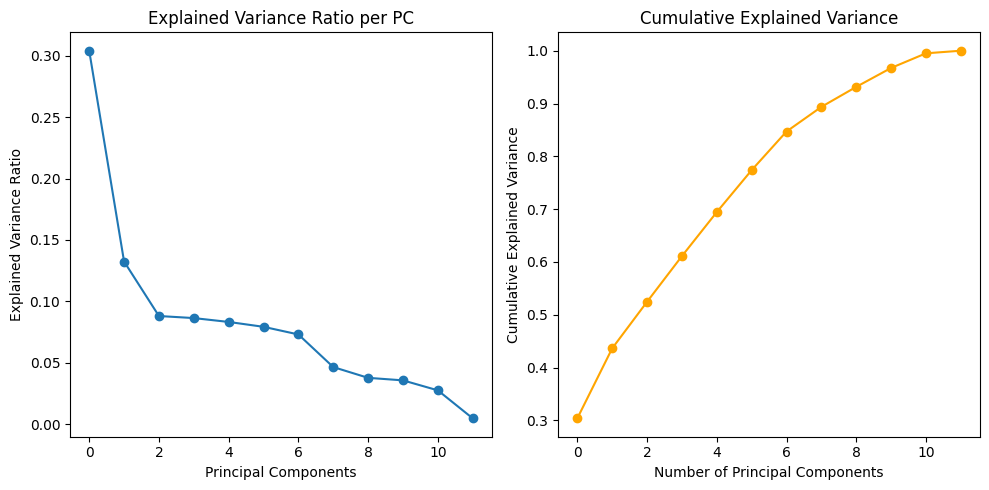

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

# Fit PCA to the scaled data
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per PC')

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


In [23]:
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain a desired amount of variance (e.g., 95%)
desired_variance = 0.95  # You can adjust this threshold as needed
n_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components to explain {desired_variance * 100}% variance: {n_components}")

Number of components to explain 95.0% variance: 10


In [24]:
# Create a PCA instance
pca = PCA(n_components=10)  # You can change the number of components

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, random_state=123)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


Accuracy (none): 60.90%


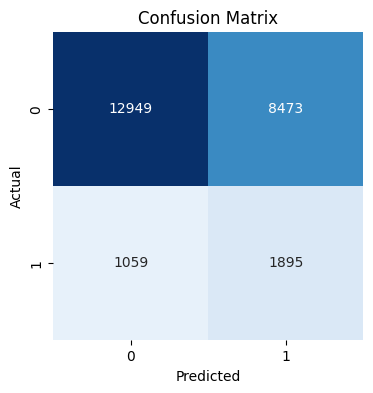

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.92      0.60      0.73     21422
           1       0.18      0.64      0.28      2954

    accuracy                           0.61     24376
   macro avg       0.55      0.62      0.51     24376
weighted avg       0.83      0.61      0.68     24376



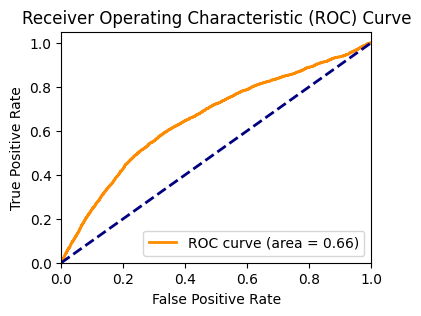

In [27]:
model_logistics_PCA = LogisticRegression(
    class_weight={
        0: 1,
        1: 7.9
    }
)

model_logistics_PCA.fit(X_train, y_train)

evaluate_model(model_logistics_PCA, 'none', X_test, y_test)
predicted_proba_logistics_PCA = model_logistics_PCA.predict_proba(X_test)
predicted_proba_logistics_PCA = predicted_proba_logistics_PCA[:,1]

get_roc_auc(y_test, predicted_proba_logistics_PCA)

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Accuracy (none): 64.40%


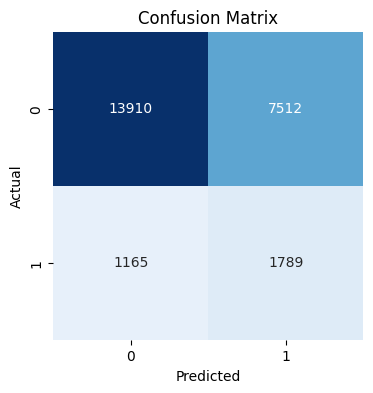

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.92      0.65      0.76     21422
           1       0.19      0.61      0.29      2954

    accuracy                           0.64     24376
   macro avg       0.56      0.63      0.53     24376
weighted avg       0.83      0.64      0.71     24376



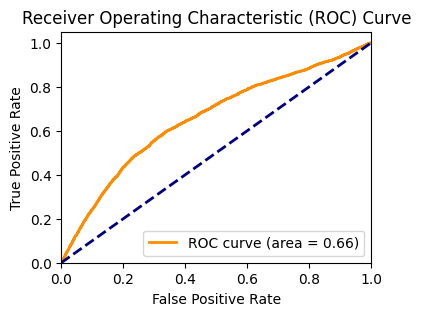

In [29]:
model_logistics = LogisticRegression(
    class_weight={
        0: 1,
        1: 1    }
)

model_logistics.fit(X_train_resampled, y_train_resampled)

evaluate_model(model_logistics, 'none', X_test, y_test)
predicted_proba_logistics = model_logistics.predict_proba(X_test)
predicted_proba_logistics = predicted_proba_logistics[:,1]

get_roc_auc(y_test, predicted_proba_logistics)

In [30]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Instantiate the RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Apply undersampling to your dataset
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# X_resampled and y_resampled now contain the undersampled dataset
print("Original Class Distribution:", Counter(y))
print("Undersampled Class Distribution:", Counter(y_resampled))


Original Class Distribution: Counter({0: 71469, 1: 9784})
Undersampled Class Distribution: Counter({0: 6830, 1: 6830})


Accuracy (none): 64.01%


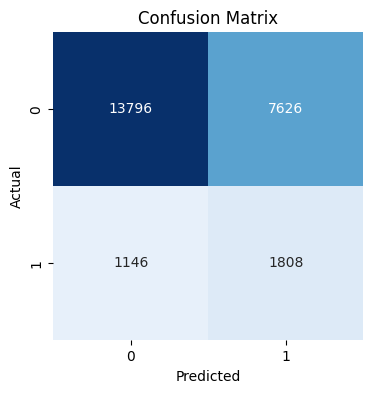

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.92      0.64      0.76     21422
           1       0.19      0.61      0.29      2954

    accuracy                           0.64     24376
   macro avg       0.56      0.63      0.53     24376
weighted avg       0.83      0.64      0.70     24376



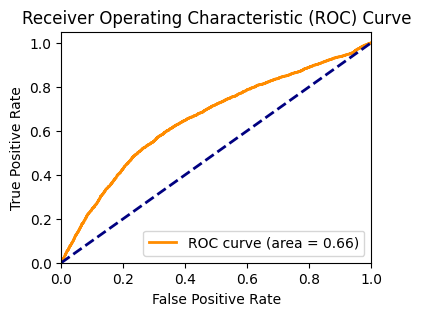

In [31]:
model_logistics = LogisticRegression(
    class_weight={
        0: 1,
        1: 1    }
)

model_logistics.fit(X_resampled, y_resampled)

evaluate_model(model_logistics, 'none', X_test, y_test)
predicted_proba_logistics = model_logistics.predict_proba(X_test)
predicted_proba_logistics = predicted_proba_logistics[:,1]

get_roc_auc(y_test, predicted_proba_logistics)